In [1]:
from optimization import *
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
random.seed(123)

In [6]:
cov_vector = [0.0005, 0.001, 0.005, 0.01, 0.02, 0.05, 0.1]

In [7]:
# Generate some covariance and return data, along with minimum variance portfolios
all_portfolios = pd.DataFrame()

for covariance in cov_vector:
    for total_assets in range(5,100):
        cov_matrix = np.matrix([[covariance for x in range(total_assets)] for y in range(total_assets)])
        np.fill_diagonal(cov_matrix, np.mean(np.sqrt(cov_vector)))
        returns = np.matrix([[random.randrange(-50,200)/1000] for x in range(total_assets)])
        portfolio = calc_portfolio(0.05, returns, cov_matrix)
        portfolio['asset_cov'] = covariance
        portfolio['assets'] = total_assets
        all_portfolios = all_portfolios.append(portfolio, ignore_index=True)

Text(0.5, 0, 'Number of Assets')

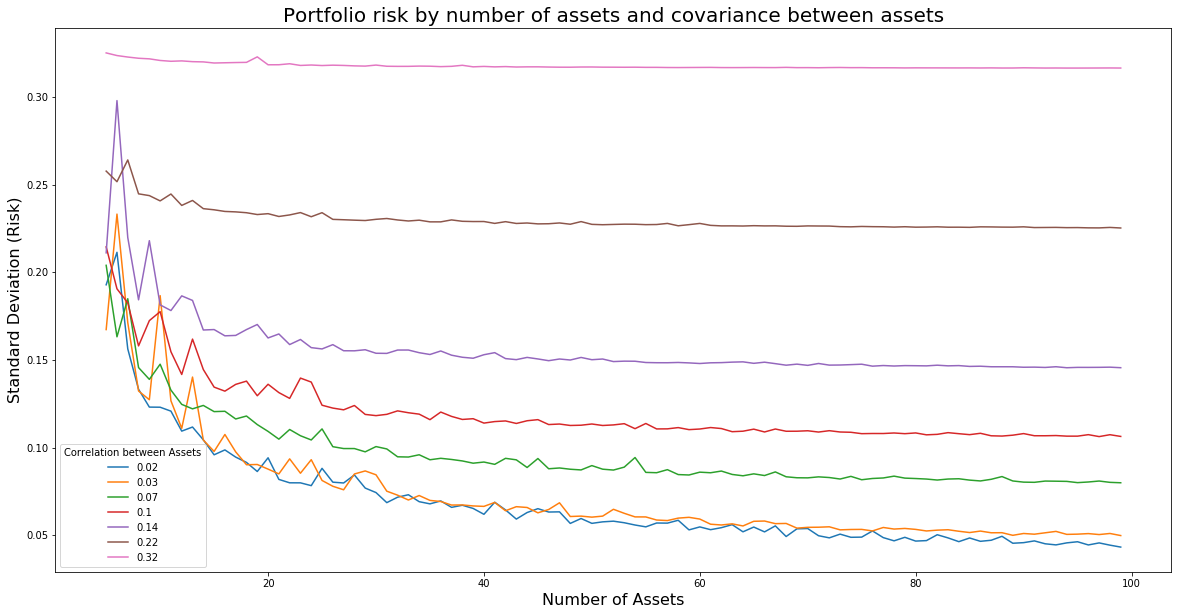

In [8]:
# Generate portfolios and plot
fig, ax = plt.subplots(figsize=(20,10))

for covariance in cov_vector:
    ax.plot(all_portfolios[all_portfolios['asset_cov'] == covariance]['assets'].values, all_portfolios[all_portfolios['asset_cov'] == covariance]['std_dev'].values)

ax.legend(labels=np.round(np.sqrt(cov_vector),2), title="Correlation between Assets")
ax.set_title('Portfolio risk by number of assets and covariance between assets', fontsize=20)
ax.set_ylabel('Standard Deviation (Risk)', fontsize=16)
ax.set_xlabel('Number of Assets', fontsize=16)




In [71]:
all_portfolios

,asset_cov,assets,mu,std_dev,tot_var,w0,w1,w2,w3,w4,...,w89,w90,w91,w92,w93,w94,w95,w96,w97,w98
0,0.0005,5.0,0.05,0.052951,0.002804,0.293909,0.217504,0.281407,0.039687,0.167493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0005,6.0,0.05,0.051391,0.002641,0.190345,0.270136,0.305166,0.133907,0.056062,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0005,7.0,0.05,0.046658,0.002177,0.116752,0.113336,0.239716,0.193604,0.203851,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0005,8.0,0.05,0.045329,0.002055,0.127335,0.029798,0.151200,0.172990,0.215532,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0005,9.0,0.05,0.041653,0.001735,0.055897,0.096581,0.153975,0.165599,0.108205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,0.0080,95.0,0.05,0.089653,0.008038,0.002677,0.015810,0.002385,0.000780,0.023107,...,0.022231,0.025004,0.016832,0.019750,0.021355,0.023982,NaN,NaN,NaN,NaN
566,0.0080,96.0,0.05,0.089641,0.008036,0.013318,0.020854,0.023958,0.025140,0.011840,...,0.022332,0.019820,0.009328,0.013466,-0.001311,0.009919,0.002235,NaN,NaN,NaN
567,0.0080,97.0,0.05,0.089628,0.008033,0.015204,0.006186,-0.000782,0.002361,0.013155,...,0.000448,0.002224,0.005093,-0.003104,0.007963,0.003317,-0.001192,-0.001328,NaN,NaN
568,0.0080,98.0,0.05,0.089658,0.008039,0.006269,0.000251,-0.003427,0.018806,0.007439,...,0.023153,0.000752,-0.004095,0.004096,0.007439,0.024156,0.015630,0.005767,0.000752,NaN


Text(0.5, 0, 'Number of Assets')

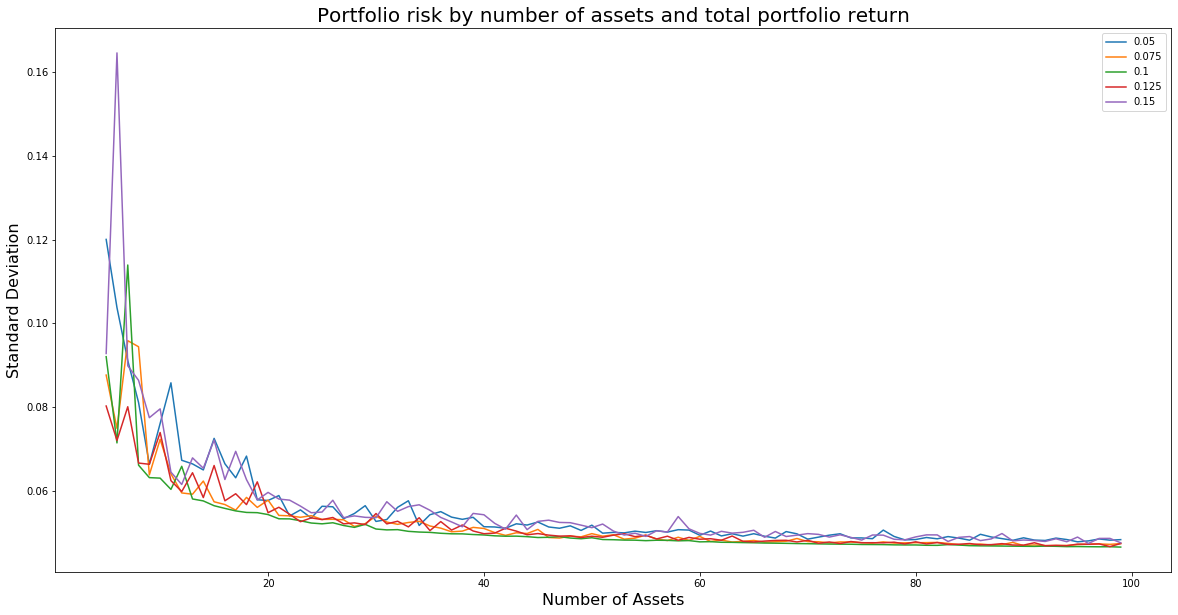

In [105]:
# Generate portfolios and plot
fig, ax = plt.subplots(figsize=(20,10))

for ret in return_vector:
    ax.plot(all_portfolios[all_portfolios['mu'] == ret]['assets'].values, all_portfolios[all_portfolios['mu'] == ret]['std_dev'].values)

ax.legend(labels=return_vector)
ax.set_title('Portfolio risk by number of assets and total portfolio return', fontsize=20)
ax.set_ylabel('Standard Deviation', fontsize=16)
ax.set_xlabel('Number of Assets', fontsize=16)